In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

Exact Solution: x**2 + 1


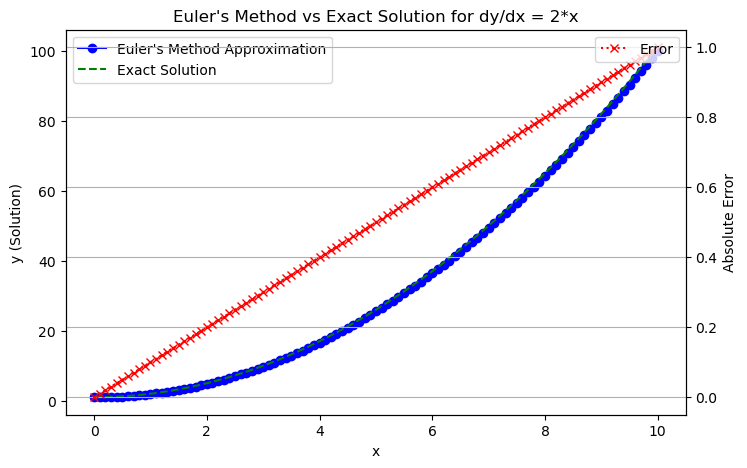

In [19]:
def make_function(equation_str):
    x,y = sp.symbols('x y')

    expr = sp.simplify(equation_str)

    return expr

def euler_method(function, step_size, y_0, x_0, x_end, exact_solution=None):
    result = function.subs({"x": x_0, "y": y_0})

    x_values = np.arange(x_0, x_end+step_size, step_size)
    y_values=[y_0]

    for i in range(len(x_values)-1):
        y_value = y_values[i] + (step_size*function.subs({"x": x_values[i], "y": y_values[i]}))
        y_values.append(y_value)
    
    plot_euler(function, x_values,y_values,exact_solution)

def exact_solve(equation_str, x_0, x_end, y_0, step_size):
    # Define symbols
    x = sp.Symbol('x')
    y = sp.Function('y')
    
    # Convert string to sympy expression; note that we pass y(x) if needed
    try:
        rhs = sp.sympify(equation_str, locals={'y': y(x)})
    except (sp.SympifyError, ValueError):
        return "Invalid equation format."
    
    # Define the ODE: dy/dx = rhs
    eq = sp.Eq(y(x).diff(x), rhs)
    
    # Solve the ODE
    solution = sp.dsolve(eq, y(x))
    
    # Get the general solution's right-hand side
    general_solution = solution.rhs
    
    # Extract the arbitrary constant (e.g. C1, C2, etc.)
    # We assume the constant is any free symbol except x.
    constants = list(general_solution.free_symbols - {x})
    if not constants:
        print("No arbitrary constant found in the solution.")
        return general_solution
    constant_symbol = constants[0]
    
    # Form the equation for the constant using the initial condition y(x_0) = y_0
    constant_eq = sp.Eq(general_solution.subs(x, x_0), y_0)
    constant_value = sp.solve(constant_eq, constant_symbol)
    
    if not constant_value:
        print("Unable to determine the constant with given initial conditions.")
        return None
    
    # Substitute the determined constant back into the general solution
    particular_solution = general_solution.subs(constant_symbol, constant_value[0])
    
    return particular_solution.simplify()


# Function to plot Euler's method results
def plot_euler(function, x_values, y_values, exact_solution=None):

    # If an exact solution is provided, set up two y-axes: one for the solutions, one for error.
    if exact_solution is not None and not isinstance(exact_solution, str):
        fig, ax1 = plt.subplots(figsize=(8, 5))
        # Plot Euler approximation on primary axis
        ax1.plot(x_values, y_values, marker='o', linestyle='-', label="Euler's Method Approximation", color='blue')
        
        # Create a numerical function from the exact solution expression
        x_sym = sp.symbols('x')
        exact_func = sp.lambdify(x_sym, exact_solution, 'numpy')
        exact_y = exact_func(x_values)
        # Plot the exact solution
        ax1.plot(x_values, exact_y, marker='', linestyle='--', label="Exact Solution", color='green')
        ax1.set_xlabel("x")
        ax1.set_ylabel("y (Solution)")
        ax1.legend(loc='upper left')
        
        # Compute the absolute error at each step
        error = np.abs(np.array(y_values) - np.array(exact_y))
        
        # Plot the error on a secondary y-axis
        ax2 = ax1.twinx()
        ax2.plot(x_values, error, marker='x', linestyle=':', label="Error", color='red')
        ax2.set_ylabel("Absolute Error")
        ax2.legend(loc='upper right')
        
        plt.title(f"Euler's Method vs Exact Solution for dy/dx = {str(function)}")
        plt.grid(True)
        plt.show()
        
    else:
        # If no exact solution, simply plot the Euler method results.
        plt.figure(figsize=(8, 5))
        plt.plot(x_values, y_values, marker='o', linestyle='-', label="Euler's Method Approximation", color='blue')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title(f"Euler's Method for dy/dx = {str(function)}")
        plt.legend()
        plt.grid(True)
        plt.show()
if __name__=="__main__":

    # Define the ODE
    equation_str = "2*x" 

    # Initial Conditions
    x_0 = 0                   # Starting x value
    y_0 = 1                   # Initial y value y(x_0) = y_0

    # Euler Method Parameters
    x_end = 10               # End x value
    step_size = 0.1           # Step size for Euler's method

    # ===== END PARAMETERS SECTION =====

    # Get Exact Solution
    exact = exact_solve(equation_str, x_0=x_0, x_end=x_end, y_0=y_0, step_size=step_size)
    print("Exact Solution:", exact)

    # Prepare Function for Euler's Method
    function = make_function(equation_str)

    # Run Euler's Method
    euler_method(function=function, step_size=step_size, y_0=y_0, x_0=x_0, x_end=x_end, exact_solution=exact)


In [ ]:
# david's example
